In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17003, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17003 (delta 107), reused 112 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (17003/17003), 15.73 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (11640/11640), done.
/content/yolov5


In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [3]:
!pip install pytesseract

In [4]:
!apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,850 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [5]:
!pip install opencv-python

In [6]:
import zipfile
import os

# Upload the ZIP file from your local machine
from google.colab import files
uploaded = files.upload()

# Get the file name of the uploaded ZIP file
zip_file_path = list(uploaded.keys())[0]

# Extract the ZIP file to the desired directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to /content/dataset folder

# Check if extraction was successful
print("Files have been extracted to /content/dataset")

Saving products.v3i.yolov5pytorch.zip to products.v3i.yolov5pytorch.zip
Files have been extracted to /content/dataset


In [7]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/dataset/data.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-10-18 08:40:56.504426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 08:40:56.524521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 08:40:56.530469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dataset

Saving 71kOsITKSkL.jpg to 71kOsITKSkL.jpg
Uploaded and renamed image: 71kOsITKSkL.jpg
YOLO inference completed: 


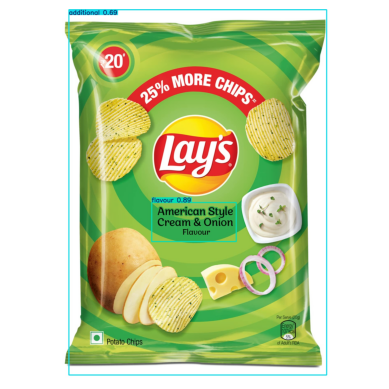

Bounding box file found: runs/detect/exp/labels/71kOsITKSkL.txt
1 0.507222 0.495278 0.696667 0.987222 0.688602
3 0.496944 0.575556 0.228333 0.105556 0.892265



In [ ]:
import subprocess
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import time

# Step 1: Upload the image from your local machine
def upload_image():
    uploaded = files.upload()  # Upload the image
    image_path = list(uploaded.keys())[0]

    # Rename the file to remove spaces and parentheses
    new_image_path = image_path.replace(" ", "_").replace("(", "").replace(")", "")
    os.rename(image_path, new_image_path)

    print(f"Uploaded and renamed image: {new_image_path}")
    return new_image_path

# Step 2: Run YOLOv5 inference on the uploaded image
def run_yolo_inference(image_path):
    # Update the path to use your trained model in 'runs/train/exp2'
    yolo_command = f"python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '{image_path}' --save-txt --save-conf"
    result = subprocess.run(yolo_command, shell=True, capture_output=True, text=True)

    if result.returncode != 0:
        print(f"Error running YOLO: {result.stderr}")
    else:
        print(f"YOLO inference completed: {result.stdout}")

# Step 3: Find the latest YOLO output folder
def get_latest_yolo_output_folder():
    folders = sorted([f.path for f in os.scandir('runs/detect') if f.is_dir()], key=os.path.getmtime)
    if folders:
        return folders[-1]  # Return the latest folder
    return None

# Step 4: Visualize the YOLO inference results
def visualize_result(image_path):
    latest_folder = get_latest_yolo_output_folder()

    if latest_folder:
        result_image_path = os.path.join(latest_folder, os.path.basename(image_path))

        if os.path.exists(result_image_path):
            result_image = cv2.imread(result_image_path)
            if result_image is not None:
                plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                plt.axis('off')  # Hide axes
                plt.show()
            else:
                print("Result image not loaded properly.")
        else:
            print(f"Result image not found at {result_image_path}")
    else:
        print("No YOLO output folder found.")

# Step 5: Check the saved bounding box information
def check_bounding_boxes(image_path):
    latest_folder = get_latest_yolo_output_folder()

    if latest_folder:
        txt_file_path = os.path.join(latest_folder, 'labels', f"{os.path.basename(image_path).split('.')[0]}.txt")
        if os.path.exists(txt_file_path):
            print(f"Bounding box file found: {txt_file_path}")
            with open(txt_file_path, 'r') as f:
                print(f.read())
        else:
            print(f"Bounding box file not found at {txt_file_path}")
    else:
        print("No YOLO output folder found.")

# Main Execution Flow
image_path = upload_image()  # Step 1: Upload an image
run_yolo_inference(image_path)  # Step 2: Run YOLO inference using the 'runs/train/exp2' model
time.sleep(5)  # Wait for YOLO to finish processing
visualize_result(image_path)  # Step 4: Visualize results
check_bounding_boxes(image_path)  # Step 5: Check bounding box info


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 27.3 MB/s eta 0:00:00


Saving test8.jpeg to test8.jpeg
Uploaded and renamed image: test8.jpeg
YOLO inference completed: 
Using YOLO output folder: runs/detect/exp8
Expected label file path: runs/detect/exp8/labels/test8.txt


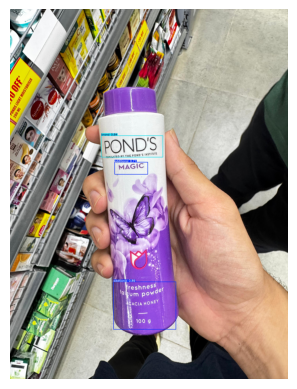

Text detected in box 1: MAGIC
Text detected in box 2: POND'S The Pond"s (nstitute
Text detected in box 3: ireshness tall um ACIA 100 9 powder HONEY


In [22]:
import subprocess
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import time
import easyocr  # Import EasyOCR for text extraction

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])  # Use 'en' for English, you can add more languages if needed

# Step 1: Upload the image from your local machine
def upload_image():
    uploaded = files.upload()  # Upload the image
    image_path = list(uploaded.keys())[0]

    # Rename the file to remove spaces and parentheses
    new_image_path = image_path.replace(" ", "_").replace("(", "").replace(")", "")
    os.rename(image_path, new_image_path)

    print(f"Uploaded and renamed image: {new_image_path}")
    return new_image_path

# Step 2: Run YOLOv5 inference on the uploaded image
def run_yolo_inference(image_path):
    # Update the path to use your trained model in 'runs/train/exp2'
    yolo_command = f"python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '{image_path}' --save-txt --save-conf"
    result = subprocess.run(yolo_command, shell=True, capture_output=True, text=True)

    if result.returncode != 0:
        print(f"Error running YOLO: {result.stderr}")
    else:
        print(f"YOLO inference completed: {result.stdout}")

# Step 3: Find the latest YOLO output folder
def get_latest_yolo_output_folder():
    folders = sorted([f.path for f in os.scandir('runs/detect') if f.is_dir()], key=os.path.getmtime)
    if folders:
        return folders[-1]  # Return the latest folder
    return None

# Step 4: Visualize the YOLO inference results
def visualize_result(image_path):
    latest_folder = get_latest_yolo_output_folder()

    if latest_folder:
        result_image_path = os.path.join(latest_folder, os.path.basename(image_path))

        if os.path.exists(result_image_path):
            result_image = cv2.imread(result_image_path)
            if result_image is not None:
                plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                plt.axis('off')  # Hide axes
                plt.show()
            else:
                print("Result image not loaded properly.")
        else:
            print(f"Result image not found at {result_image_path}")
    else:
        print("No YOLO output folder found.")

# Step 5: Check the saved bounding box information
def check_bounding_boxes(image_path):
    latest_folder = get_latest_yolo_output_folder()

    if latest_folder:
        txt_file_path = os.path.join(latest_folder, 'labels', f"{os.path.basename(image_path).split('.')[0]}.txt")
        print(f"Expected bounding box file path: {txt_file_path}")  # Print to manually verify
        if os.path.exists(txt_file_path):
            print(f"Bounding box file found: {txt_file_path}")
            with open(txt_file_path, 'r') as f:
                print(f.read())
        else:
            print(f"Bounding box file not found at {txt_file_path}")
    else:
        print("No YOLO output folder found.")

# Step 6: Extract text using EasyOCR from each detected bounding box
def extract_text_with_easyocr(image, boxes):
    for i, box in enumerate(boxes):
        x, y, w, h = box
        cropped_image = image[y:y+h, x:x+w]

        # Use EasyOCR to extract text from the cropped region
        result = reader.readtext(cropped_image)

        # Print detected text from the region
        if result:
            detected_text = " ".join([res[1] for res in result])
            print(f"Text detected in box {i+1}: {detected_text}")
        else:
            print(f"No text detected in box {i+1}")

# Full pipeline function for inference, OCR, and text extraction
def run_full_pipeline(image_path):
    run_yolo_inference(image_path)

    # Wait for YOLO to finish processing
    time.sleep(5)  # Add some delay to ensure YOLO finishes saving the result files

    # Get the latest YOLO output folder dynamically
    latest_folder = get_latest_yolo_output_folder()
    if latest_folder:
        result_image_path = f'{latest_folder}/{os.path.basename(image_path)}'
        txt_file_path = f'{latest_folder}/labels/{os.path.basename(image_path).split(".")[0]}.txt'
        print(f"Using YOLO output folder: {latest_folder}")
        print(f"Expected label file path: {txt_file_path}")
    else:
        print("No YOLO output folder found")
        return

    # Visualize result image
    visualize_result(result_image_path)

    # Load image and bounding boxes
    image = cv2.imread(image_path)
    img_height, img_width = image.shape[:2]

    # Read YOLO's bounding boxes from the .txt file
    detected_boxes = []
    if os.path.exists(txt_file_path):
        with open(txt_file_path, 'r') as f:
            for line in f.readlines():
                values = list(map(float, line.strip().split()))
                if len(values) >= 5:
                    class_id, x_center, y_center, width, height = values[:5]
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height
                    x = int(x_center - width / 2)
                    y = int(y_center - height / 2)
                    detected_boxes.append((x, y, int(width), int(height)))
    else:
        print(f"Label file {txt_file_path} does not exist.")

    # Apply EasyOCR on detected bounding boxes
    extract_text_with_easyocr(image, detected_boxes)

# Main Execution Flow
image_path = upload_image()  # Step 1: Upload an image
run_full_pipeline(image_path)  # Run YOLO and extract text using EasyOCR


In [11]:
import os
model_path = 'runs/train/exp/weights/best.pt'  # Update 'exp' with the correct folder if different
if os.path.exists(model_path):
    print(f'Model found at {model_path}')
else:
    print('Model not found. Check the folder name.')


Model found at runs/train/exp/weights/best.pt


In [14]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 15.3 MB/s eta 0:00:00


In [ ]:
import cv2
import pytesseract
import os
from matplotlib import pyplot as plt

# Run YOLO inference to create .txt file with bounding boxes
def run_yolo_inference(image_path):
    yolo_command = f"!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source {image_path} --save-txt --save-conf"
    os.system(yolo_command)

# Function to read YOLO bounding boxes from .txt file
def read_yolo_txt_file(txt_file_path, img_width, img_height):
    boxes = []
    if os.path.exists(txt_file_path):  # Ensure file exists
        with open(txt_file_path, 'r') as f:
            for line in f.readlines():
                values = list(map(float, line.strip().split()))
                if len(values) >= 5:
                    class_id, x_center, y_center, width, height = values[:5]
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height
                    x = int(x_center - width / 2)
                    y = int(y_center - height / 2)
                    boxes.append((x, y, int(width), int(height)))
    return boxes

# Preprocessing for OCR using edge detection
def preprocess_for_ocr(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    _, thresh = cv2.threshold(edges, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

# Apply OCR to a detected region
def apply_ocr_to_region(image, box):
    x, y, w, h = box
    roi = image[y:y+h, x:x+w]
    preprocessed_roi = preprocess_for_ocr(roi)
    config = "--oem 3 --psm 6"
    ocr_text = pytesseract.image_to_string(preprocessed_roi, config=config)
    return ocr_text

# Visualize bounding boxes
def draw_boxes(image, boxes):
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return image

# Run inference and apply OCR
def run_inference_and_ocr(image_path):
    run_yolo_inference(image_path)

    # Ensure YOLO output file exists
    txt_file_path = f'/content/yolov5/runs/detect/exp/labels/{os.path.basename(image_path).split(".")[0]}.txt'
    if not os.path.exists(txt_file_path):
        print(f"Error: Bounding box file not found at {txt_file_path}")
        return

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    img_height, img_width = image.shape[:2]
    detected_boxes = read_yolo_txt_file(txt_file_path, img_width, img_height)

    # Draw boxes and display image
    if detected_boxes:
        image_with_boxes = draw_boxes(image, detected_boxes)
        plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Apply OCR on each detected box
        for box in detected_boxes:
            text = apply_ocr_to_region(image, box)
            print(f"Detected text: {text}")
    else:
        print("No bounding boxes detected")

# Run inference and OCR on your test image
image_path = '/content/maggie.webp'
run_inference_and_ocr(image_path)


Error: Bounding box file not found at /content/yolov5/runs/detect/exp/labels/maggie.txt


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/maggie.webp


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/maggie.webp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/maggie.webp: 640x640 1 brand_name, 1 flavour, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 531.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


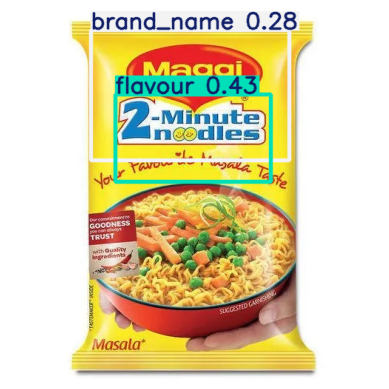

In [ ]:
from matplotlib import pyplot as plt
import cv2

# Load and display the result image
result_image_path = 'runs/detect/exp4/maggie.webp'  # Path to the output image
result_image = cv2.imread(result_image_path)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/maggie.webp --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/maggie.webp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/maggie.webp: 640x640 1 brand_name, 1 flavour, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 746.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5
1 labels saved to runs/detect/exp5/labels


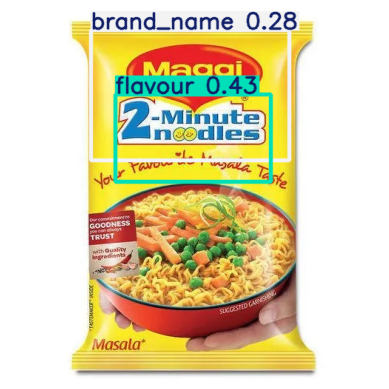

In [ ]:
from matplotlib import pyplot as plt
import cv2
result_image_path = 'runs/detect/exp5/maggie.webp'
result_image = cv2.imread(result_image_path)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
def read_yolo_txt_file(txt_file_path, img_width, img_height):
    boxes = []
    with open(txt_file_path, 'r') as f:
        for line in f.readlines():
            values = list(map(float, line.strip().split()))
            if len(values) >= 5:
                class_id, x_center, y_center, width, height = values[:5]
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                x = int(x_center - width / 2)
                y = int(y_center - height / 2)
                boxes.append((x, y, int(width), int(height)))
    return boxes


In [ ]:
import cv2
import pytesseract

# Enhanced preprocessing for OCR with resizing and noise removal
def preprocess_for_ocr(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # Resize for better accuracy
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)  # Apply Gaussian blur to remove noise
    _, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Thresholding
    return thresh

# Apply OCR to a detected region
def apply_ocr_to_region(image, box):
    x, y, w, h = box
    roi = image[y:y+h, x:x+w]  # Crop region of interest
    preprocessed_roi = preprocess_for_ocr(roi)  # Apply enhanced preprocessing
    config = "--oem 3 --psm 6"  # OCR configuration
    ocr_text = pytesseract.image_to_string(preprocessed_roi, config=config)
    return ocr_text.strip()

# Function to read YOLO bounding boxes from the .txt file
def read_yolo_txt_file(txt_file_path, img_width, img_height):
    boxes = []
    with open(txt_file_path, 'r') as f:
        for line in f.readlines():
            values = list(map(float, line.strip().split()))
            if len(values) >= 5:
                class_id, x_center, y_center, width, height = values[:5]
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                x = int(x_center - width / 2)
                y = int(y_center - height / 2)
                boxes.append((int(class_id), (x, y, int(width), int(height))))
    return boxes

# General mapping for YOLO class labels to categories
category_mapping = {
    0: "Brand Name",
    1: "Flavor",
    2: "Size",
    3: "Additional Information"
}

# Load the image and apply OCR
image = cv2.imread('/content/maggie.webp')
img_height, img_width = image.shape[:2]
detected_boxes = read_yolo_txt_file('runs/detect/exp5/labels/maggie.txt', img_width, img_height)

# Initialize categories
final_categories = {"Brand Name": "", "Flavor": "", "Size": "", "Additional Information": ""}

# Apply OCR to each detected box and categorize based on the class ID
for class_id, box in detected_boxes:
    text = apply_ocr_to_region(image, box)
    if text and class_id in category_mapping:  # Only categorize if text is detected and label is valid
        final_categories[category_mapping[class_id]] = text

# Display the final results
for category, value in final_categories.items():
    print(f"{category}: {value}")


Brand Name: 
Flavor: 
Size: 
Additional Information: Z Minute
noodles
Reroute Masata »


Saving maggi-2-minutes-noodles.jpg to maggi-2-minutes-noodles.jpg
Image uploaded and renamed: maggi-2-minutes-noodles.jpg
YOLO inference completed: 
Using YOLO output folder: runs/detect/exp5


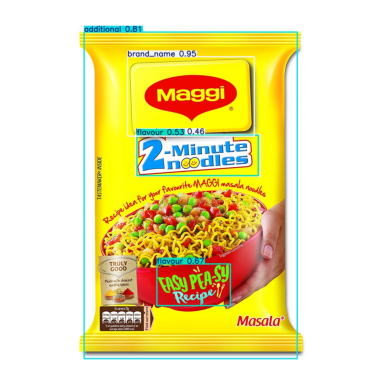

Brand Name: 
Flavor: 
Size: a>
Additional Information: Wyre

ne

/


In [ ]:
import subprocess
import os
import cv2
import pytesseract
from matplotlib import pyplot as plt
from google.colab import files
import time

# Function to upload and handle image, rename if necessary
def upload_image():
    uploaded = files.upload()  # Upload the image
    image_path = list(uploaded.keys())[0]

    # Rename the file to remove spaces and parentheses
    new_image_path = image_path.replace(" ", "_").replace("(", "").replace(")", "")
    os.rename(image_path, new_image_path)

    print(f"Image uploaded and renamed: {new_image_path}")
    return new_image_path

# Function to run YOLO inference and save results using subprocess
def run_yolo_inference(image_path):
    yolo_command = f"python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '{image_path}' --save-txt --save-conf"
    result = subprocess.run(yolo_command, shell=True, capture_output=True, text=True)

    if result.returncode != 0:
        print(f"Error running YOLO: {result.stderr}")
    else:
        print(f"YOLO inference completed: {result.stdout}")

# Function to find the latest YOLO output folder
def get_latest_yolo_output_folder():
    folders = sorted([f.path for f in os.scandir('runs/detect') if f.is_dir()], key=os.path.getmtime)
    if folders:
        return folders[-1]  # Return the latest folder
    return None

# Function to visualize the YOLO result image
def visualize_result(result_image_path):
    if os.path.exists(result_image_path):
        result_image = cv2.imread(result_image_path)
        if result_image is not None:
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
        else:
            print("Image is not loaded properly.")
    else:
        print(f"Result image not found at {result_image_path}")

# Simplified grayscale conversion for OCR
def preprocess_for_ocr(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    return gray

# Apply OCR with multiple PSM modes for better accuracy
def apply_ocr_to_region(image, box):
    x, y, w, h = box
    roi = image[y:y+h, x:x+w]
    preprocessed_roi = preprocess_for_ocr(roi)

    # Test different PSM values
    psm_configs = ["--oem 3 --psm 6", "--oem 3 --psm 7", "--oem 3 --psm 11"]
    ocr_results = []

    for config in psm_configs:
        ocr_text = pytesseract.image_to_string(preprocessed_roi, config=config)
        ocr_results.append(ocr_text.strip())

    # Return the result with the maximum text length (best OCR result)
    return max(ocr_results, key=len)

# Function to read YOLO bounding boxes from the .txt file
def read_yolo_txt_file(txt_file_path, img_width, img_height):
    boxes = []
    if os.path.exists(txt_file_path):
        with open(txt_file_path, 'r') as f:
            for line in f.readlines():
                values = list(map(float, line.strip().split()))
                if len(values) >= 5:
                    class_id, x_center, y_center, width, height = values[:5]
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height
                    x = int(x_center - width / 2)
                    y = int(y_center - height / 2)
                    boxes.append((int(class_id), (x, y, int(width), int(height))))
    else:
        print(f"Bounding box file not found at {txt_file_path}")
    return boxes

# General mapping for YOLO class labels to categories
category_mapping = {
    0: "Brand Name",
    1: "Flavor",
    2: "Size",
    3: "Additional Information"
}

# Post-processing to categorize OCR output based on keywords
def categorize_ocr_output(text, class_id):
    brand_keywords = ["lays", "Pepsi", "Maggi", "Nestle"]  # Add more brands
    flavor_keywords = ["Classic", "Spicy", "Cheese"]  # Add common flavors
    size_keywords = ["kg", "g", "ml", "L", "oz"]  # Add common size units
    additional_keywords = ["Family Size", "No Added Sugar"]  # Add common additional info

    if any(keyword in text for keyword in brand_keywords):
        return "Brand Name"
    elif any(keyword in text for keyword in flavor_keywords):
        return "Flavor"
    elif any(keyword in text for keyword in size_keywords):
        return "Size"
    elif any(keyword in text for keyword in additional_keywords):
        return "Additional Information"
    else:
        return category_mapping.get(class_id, "Unknown")

# Full pipeline function for inference, OCR, and categorization
def run_full_pipeline_with_post_processing(image_path):
    run_yolo_inference(image_path)

    # Wait for YOLO to finish processing
    time.sleep(5)

    # Get the latest YOLO output folder dynamically
    latest_folder = get_latest_yolo_output_folder()
    if latest_folder:
        result_image_path = f'{latest_folder}/{os.path.basename(image_path)}'
        txt_file_path = f'{latest_folder}/labels/{os.path.basename(image_path).split(".")[0]}.txt'
        print(f"Using YOLO output folder: {latest_folder}")
    else:
        print("No YOLO output folder found")
        return

    # Visualize result image
    visualize_result(result_image_path)

    # Load image and bounding boxes
    image = cv2.imread(image_path)
    img_height, img_width = image.shape[:2]
    detected_boxes = read_yolo_txt_file(txt_file_path, img_width, img_height)

    # Initialize categories
    final_categories = {"Brand Name": "", "Flavor": "", "Size": "", "Additional Information": ""}

    # Apply OCR and post-process the results
    for class_id, box in detected_boxes:
        text = apply_ocr_to_region(image, box)
        category = categorize_ocr_output(text, class_id)  # Categorize based on OCR text
        if text and category in final_categories:
            final_categories[category] = text

    # Display the final categorized results
    for category, value in final_categories.items():
        print(f"{category}: {value}")

# Main execution flow
image_path = upload_image()  # Allow dynamic image upload
run_full_pipeline_with_post_processing(image_path)


In [ ]:
!ls runs/detect/exp


labels


In [ ]:
import os

def run_yolo_inference(image_path):
    # Run YOLOv5 inference
    yolo_command = f"!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source {image_path} --save-txt --save-conf"
    os.system(yolo_command)

    # Check the actual output path after inference
    output_folder = '/content/yolov5/runs/detect/'
    for root, dirs, files in os.walk(output_folder):
        for dir in dirs:
            print(f"YOLO output directory: {os.path.join(root, dir)}")
        for file in files:
            print(f"YOLO output file: {os.path.join(root, file)}")

# Run inference
image_path = '/content/maggie.webp'
run_yolo_inference(image_path)


YOLO output directory: /content/yolov5/runs/detect/exp
YOLO output directory: /content/yolov5/runs/detect/exp/labels


In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/sample_images/lays.jpeg --save-txt --save-conf


detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/sample_images/lays.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/sample_images/lays.jpeg: 640x480 1 additional, 1 brand_name, 27.9ms
Speed: 0.5ms pre-process, 27.9ms inference, 582.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


In [ ]:
def yolo_to_pixel_coordinates(bbox, img_width, img_height):
    class_id, x_center, y_center, width, height = bbox
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Convert to pixel coordinates for bounding box
    x = int(x_center - width / 2)
    y = int(y_center - height / 2)
    w = int(width)
    h = int(height)

    return (x, y, w, h)


In [ ]:
import cv2
import pytesseract
import os

# Function to read YOLO bounding boxes from .txt file, handling extra values like confidence scores
def read_yolo_txt_file(txt_file_path, img_width, img_height):
    boxes = []
    with open(txt_file_path, 'r') as f:
        for line in f.readlines():
            values = list(map(float, line.strip().split()))
            if len(values) >= 5:
                class_id, x_center, y_center, width, height = values[:5]  # Ignore additional values like confidence
                # Convert normalized coordinates to pixel values
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                # Calculate the top-left corner of the bounding box
                x = int(x_center - width / 2)
                y = int(y_center - height / 2)
                boxes.append((x, y, int(width), int(height)))
    return boxes

# Function to apply OCR to a detected region
def apply_ocr_to_region(image, box):
    x, y, w, h = box  # YOLO gives (x, y, width, height) as box
    roi = image[y:y+h, x:x+w]  # Extract region of interest
    ocr_text = pytesseract.image_to_string(roi)  # Apply OCR
    return ocr_text

# Step 1: Run YOLOv5 inference
def run_yolo_inference(image_path):
    # Run YOLOv5 inference (this should generate the .txt file with bounding boxes)
    yolo_command = f"!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source {image_path} --save-txt --save-conf"
    os.system(yolo_command)

# Step 2: Extract bounding boxes and apply OCR
def process_image_with_ocr(image_path, txt_file_path):
    # Load the image
    image = cv2.imread(image_path)

    # Get image dimensions
    img_height, img_width = image.shape[:2]

    # Read bounding boxes from YOLO's output
    detected_boxes = read_yolo_txt_file(txt_file_path, img_width, img_height)

    # Loop through each detected box and apply OCR
    for box in detected_boxes:
        text = apply_ocr_to_region(image, box)
        print(f"Detected text: {text}")

# Full process function
def run_full_ocr_pipeline(image_path, txt_file_path):
    # Step 1: Run YOLO inference
    run_yolo_inference(image_path)

    # Step 2: Process detected regions with OCR
    process_image_with_ocr(image_path, txt_file_path)

# Path to the test image
image_path = '/content/sample_images/lays.jpeg'

# Path to the YOLO output .txt file (update with correct path after inference)
txt_file_path = '/content/yolov5/runs/detect/exp/labels/lays.txt'

# Run the full pipeline
run_full_ocr_pipeline(image_path, txt_file_path)


Detected text: 
Detected text:  



In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/maggie.webp --save-txt --save-conf


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/maggie.webp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>


In [ ]:
!ls /content/dataset/train/images
!ls /content/dataset/valid/images


1381_jpg.rf.6c5de5179db9f3e4ca2aabb29ac87be0.jpg
1382_jpg.rf.8f05719607d30268543711be7467e016.jpg
1383_jpg.rf.ae0e3bea5e1570094a5957f97b46d5bb.jpg
1385_jpg.rf.63d5a3dd28ae454dc0938bb52ad556f9.jpg
1386_jpg.rf.618c9c7b428dde441bc5f431b8ef4771.jpg
1387_jpg.rf.6b8b76b4b018bb3d3adb4ea837ef6231.jpg
1389_jpg.rf.51df40d8d644d64cf0c29e6a202e6f8e.jpg
1390_jpg.rf.df71f50795985a12da306f525ef190dd.jpg
1391_jpg.rf.8ad1e2976769f960a03f1f43ed9879d8.jpg
1392_jpg.rf.7d9c9c16d29087c30eb53ec75c734376.jpg
1393_jpg.rf.ca4c06d798f02bb5de3f88f132299a5d.jpg
1394_jpg.rf.44c7fffd6c828a150390657196e0d84c.jpg
1395_jpg.rf.f10f856a4ff8edf23a38c0de3198e7f2.jpg
1396_jpg.rf.47b4d90e6101f3497a55cae637e6bff1.jpg
1397_jpg.rf.e11e231f01a271c2e2003962d97ff59e.jpg
1398_jpg.rf.ca965e0acdd4d7229c6b47c50708108e.jpg
1399_jpg.rf.b4b1c0639bc49573f5d6c4ff9e14938f.jpg
1402_jpg.rf.2b7ea0013aa9e8241d644764e49182d9.jpg
1403_jpg.rf.2dede1115f2ebdab68b33ce4c5a49130.jpg
1404_jpg.rf.01ec59c9149625009ddc47e5b2c92d05.jpg
1407_jpg.rf.645836a9